In [1]:
!wget https://archive.ics.uci.edu/static/public/186/wine+quality.zip

--2023-12-31 17:57:27--  https://archive.ics.uci.edu/static/public/186/wine+quality.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘wine+quality.zip’

wine+quality.zip        [ <=>                ]  89.21K  --.-KB/s    in 0.1s    

2023-12-31 17:57:27 (939 KB/s) - ‘wine+quality.zip’ saved [91353]



In [2]:
!unzip /content/wine+quality.zip -d /content/data

Archive:  /content/wine+quality.zip
  inflating: /content/data/winequality-red.csv  
  inflating: /content/data/winequality-white.csv  
  inflating: /content/data/winequality.names  


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

In [4]:
file_path = '/content/data/winequality-red.csv'
df = pd.read_csv(file_path, sep=';')

In [12]:
bins = (0,5.5,10)
df['quality'] = pd.to_numeric(df['quality'], errors='coerce')
categories = pd.cut(df['quality'], bins, labels = ['bad','good'])
df['quality'] = categories

In [6]:
X = df.drop(['quality'], axis = 1)
scaler = MinMaxScaler()
X_new = scaler.fit_transform(X)
y = df['quality']
labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 333)


In [9]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [10]:
y_pred = classifier.predict(X_test)

Accuracy is 0.746875


<Axes: >

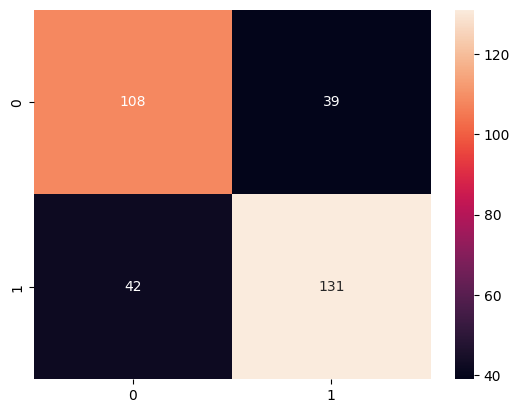

In [11]:
print("Accuracy is {}".format(accuracy_score(y_test, y_pred)))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt='2.0f')
